In [1]:
import os
import pandas as pd
import numpy as np
import time

In [2]:
os.getcwd()

'/Users/user/Documents/GitHub/normet/tutorials'

In [3]:
os.chdir('../')

In [4]:
#date_parser = lambda x: pd.to_datetime(x, format='%d/%m/%Y %H:%M:%S')
df=pd.read_excel(r'./normet/datasets/Deweather/testdata.xlsx',parse_dates=['date'])

In [5]:
import normet.autodew as ad

In [6]:
#from normet.autodew import do_all

In [5]:
all_features=['date_unix','day_julian', 'weekday', 'hour','ws', 'wd','air_temp', 'atmos_pres', 'dew_point', 'RH','blh']

In [8]:
date_start = time.time()
df_dew,modstat=ad.do_all(df, value='PM2.5',
                     feature_names=all_features,
              split_method = 'random',time_budget=60,
                     variables_sample=['ws', 'wd','air_temp', 'atmos_pres', 'dew_point', 'RH','blh'], 
                     n_samples=1000,fraction=0.75)
date_post_training = time.time()
date_post_training-date_start

126.20627212524414

<Axes: xlabel='date'>

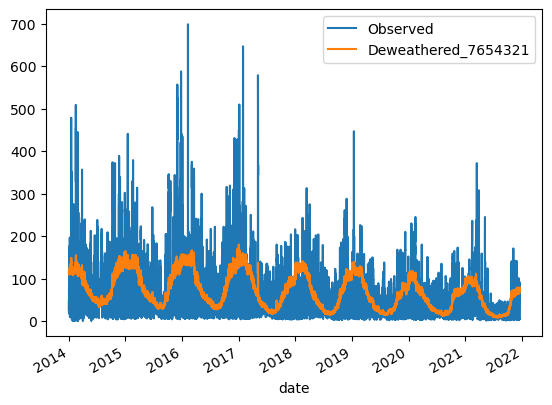

In [9]:
df_dew.plot()

In [10]:
df_dew1,modstat1=ad.do_all_unc(df, value='PM2.5',
                     feature_names=all_features,
              split_method = 'random',time_budget=30,
                     variables_sample=['ws', 'wd','air_temp', 'atmos_pres', 'dew_point', 'RH','blh'], 
                     n_samples=300,n_models=10)

In [11]:
modstat1[modstat1['set']=='testing'].sort_values('R2').iloc[-1,:]

n               5800
FAC2         0.86069
MB          0.303674
MGE        16.942896
NMB         0.005362
NMGE        0.299139
RMSE       28.558919
r           0.881657
p_value          0.0
COE         0.596872
IOA         0.798436
R2          0.777319
set          testing
seed          120727
Name: 0, dtype: object

In [12]:
df_dew,modstat=ad.do_all(df, value='PM2.5',
                     feature_names=all_features,
              split_method = 'random',time_budget=30,
                     variables_sample=['ws', 'wd','air_temp', 'atmos_pres', 'dew_point', 'RH','blh'], 
                     n_samples=300,fraction=0.75,seed=120727)

In [13]:
modstat

,n,FAC2,MB,MGE,NMB,NMGE,RMSE,r,p_value,COE,IOA,R2,set
0,5800,0.860690,0.303674,16.942896,5.361582e-03,0.299139,28.558919,0.881657,0.0,0.596872,0.798436,0.777319,testing
0,17398,0.999138,-0.000006,0.767159,-1.116355e-07,0.013580,1.029465,0.999867,0.0,0.981714,0.990857,0.999733,training
0,23198,0.964523,0.075920,4.811442,1.343010e-03,0.085113,14.307878,0.971761,0.0,0.885367,0.942683,0.944320,all


In [15]:
df_dew.head()

,Observed,Deweathered_120727
date,,
2014-01-01 08:00:00,45.166667,155.331940
2014-01-01 11:00:00,28.000000,158.249252
2014-01-01 14:00:00,23.166667,164.056046
2014-01-01 17:00:00,23.833333,154.938843
2014-01-01 20:00:00,59.750000,149.357620


<Axes: xlabel='date'>

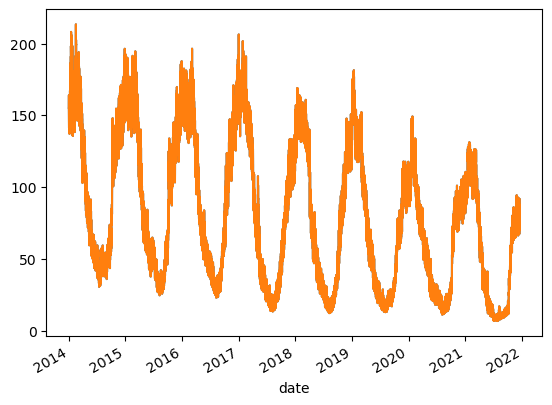

In [16]:
df_dew1['Deweathered_120727'].plot()
df_dew['Deweathered_120727'].plot()

<Axes: xlabel='date'>

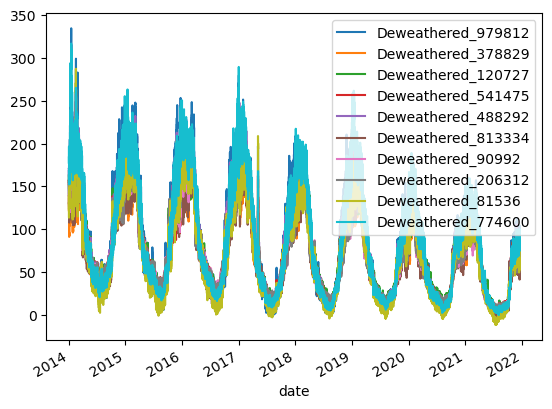

In [17]:
df_dew1.iloc[:,1:11].plot()

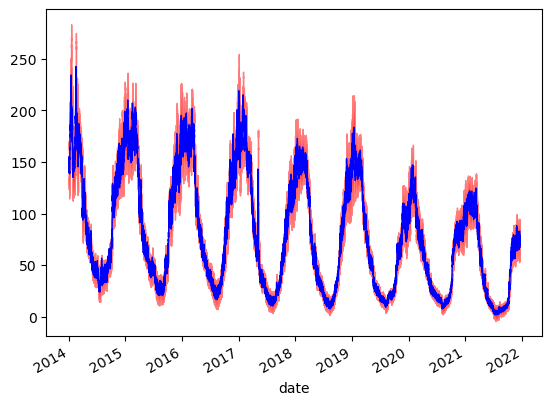

In [18]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots()
df_dew1['mean'].plot(c='b',lw=1)
ax.fill_between(df_dew1.index,df_dew1['mean']-df_dew1['std'],df_dew1['mean']+df_dew1['std'],color='r',alpha=0.5)
#df_dew1['median'].plot()

In [19]:
df=pd.read_excel(r'./normet/datasets/Deweather/testdata.xlsx',parse_dates=['date'])
df=ad.prepare_data(df, value='PM2.5', split_method = 'random',na_rm=False, replace=False, fraction=0.75)

In [20]:
df.head()

,rowid,date,ssr,tp,blh,tcc,sp,ws,wd,air_temp,...,PM10,value,Ox,Lunar_monthday,day,date_unix,day_julian,weekday,hour,set
0,0,2014-01-01 08:00:00,1.136630e+04,0.0,22.416888,0.0,100193.701618,4.666667,278.654722,6.000000,...,118.416667,45.166667,42.563856,12&1,1,1.388563e+09,1,3,8,testing
1,1,2014-01-01 11:00:00,1.098169e+06,0.0,1036.592302,0.0,100372.404415,6.000000,291.603066,9.400000,...,78.250000,28.000000,43.898884,12&1,1,1.388574e+09,1,3,11,training
2,2,2014-01-01 14:00:00,1.255284e+06,0.0,1653.530020,0.0,100216.797030,6.333333,292.695419,11.300000,...,58.250000,23.166667,43.964922,12&1,1,1.388585e+09,1,3,14,testing
3,3,2014-01-01 17:00:00,1.306076e+05,0.0,40.497319,0.0,100307.868299,3.333333,275.963757,9.366667,...,68.583333,23.833333,44.421830,12&1,1,1.388596e+09,1,3,17,testing
4,4,2014-01-01 20:00:00,0.000000e+00,0.0,19.378160,0.0,100514.007135,1.000000,180.000000,2.600000,...,133.916667,59.750000,52.910328,12&1,1,1.388606e+09,1,3,20,training


In [21]:
automl=ad.train_model(df,variables=all_features,
                time_budget= 120,  metric= 'r2', estimator_list=['lgbm'],task= 'regression', seed= 7654321);

In [22]:
date_start = time.time()
df_dew = ad.normalise(automl, df, 
                           feature_names = all_features,
                          variables= ['ws','wd', 'air_temp', 'atmos_pres', 'dew_point', 'RH','blh'],
                          n_samples=1000)
date_post_training = time.time()
date_post_training-date_start

195.87370610237122

<Axes: xlabel='date'>

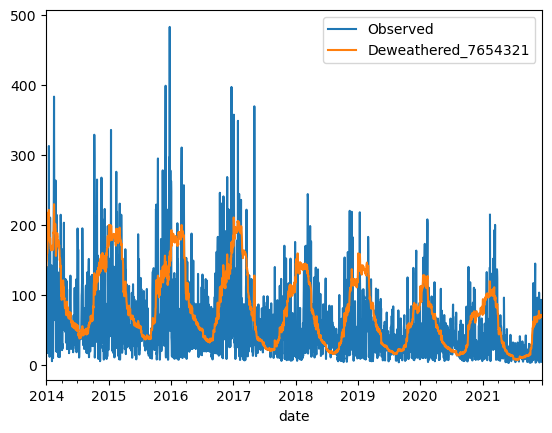

In [23]:
df_dew.resample('1d').mean().plot()

In [24]:
df_dew

,Observed,Deweathered_7654321
date,,
2014-01-01 08:00:00,45.166667,147.514074
2014-01-01 11:00:00,28.000000,148.624470
2014-01-01 14:00:00,23.166667,140.133428
2014-01-01 17:00:00,23.833333,134.618473
2014-01-01 20:00:00,59.750000,138.801826
...,...,...
2021-12-17 02:00:00,5.000000,65.966050
2021-12-17 05:00:00,4.000000,63.370295
2021-12-17 08:00:00,5.000000,64.780928


In [25]:
ad.modStats(df,set='testing')

,n,FAC2,MB,MGE,NMB,NMGE,RMSE,r,p_value,COE,IOA,R2,set
0,5800,0.847586,0.124464,17.012242,0.002229,0.304695,30.0392,0.866775,0.0,0.590122,0.795061,0.751298,testing


In [26]:
import normet.pdp as pdp

In [27]:
pdp_value=pdp.pdp_all(automl,df,feature_names=all_features)

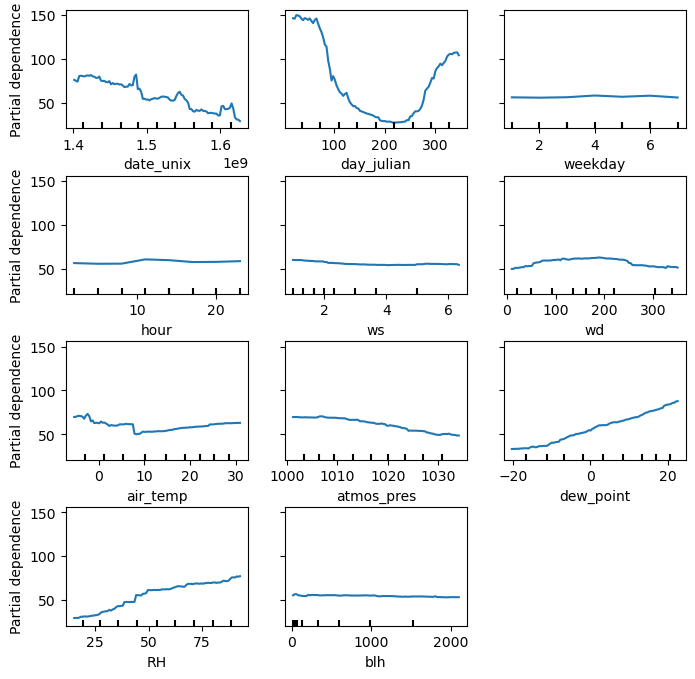

In [28]:
pdp.pdp_plot(automl, df, feature_names=all_features,figsize=(8,8),hspace=0.4)

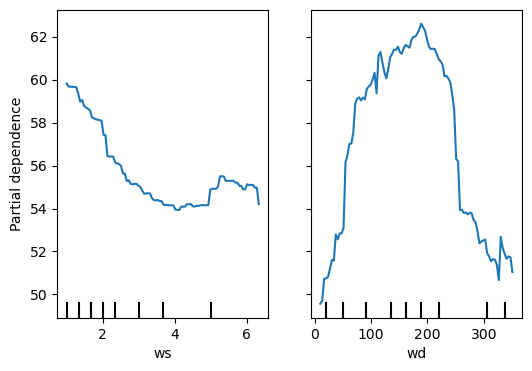

In [29]:
pdp.pdp_plot(automl, df, feature_names=all_features,variables=['ws','wd'],kind='average',figsize=(6,4))

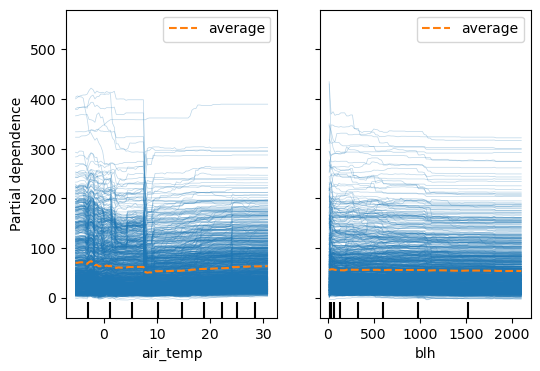

In [30]:
pdp.pdp_plot(automl, df, feature_names=all_features,variables=['air_temp','blh'],kind='both',figsize=(6,4))

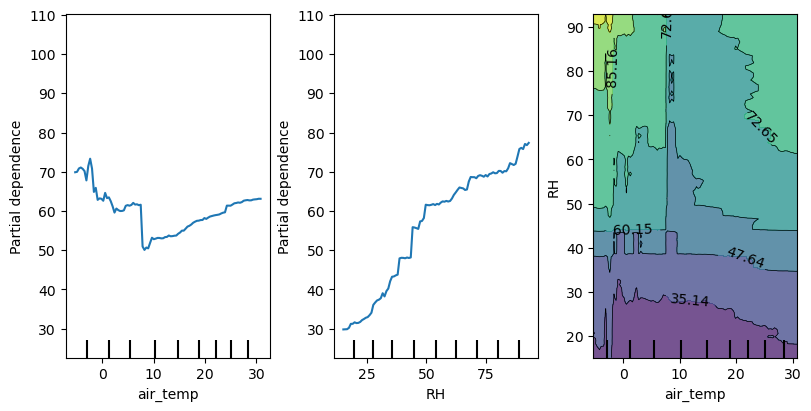

In [31]:
pdp.pdp_interaction(automl,df,variables=['air_temp','RH',('air_temp','RH')],kind='average',
                training_only=True,ncols=3,figsize=(8,4),constrained_layout=True)

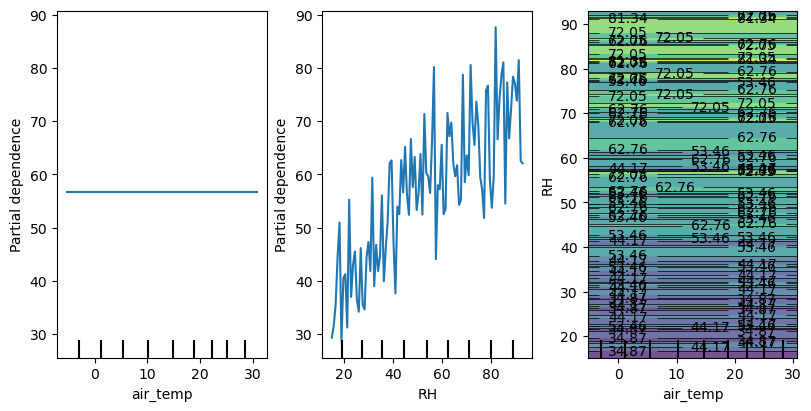

In [32]:
pdp.pdp_nointeraction(automl,df,feature_names=all_features,variables=['air_temp','RH',('air_temp','RH')],
                  kind='average',training_only=True,ncols=3,figsize=(8,4),constrained_layout=True)

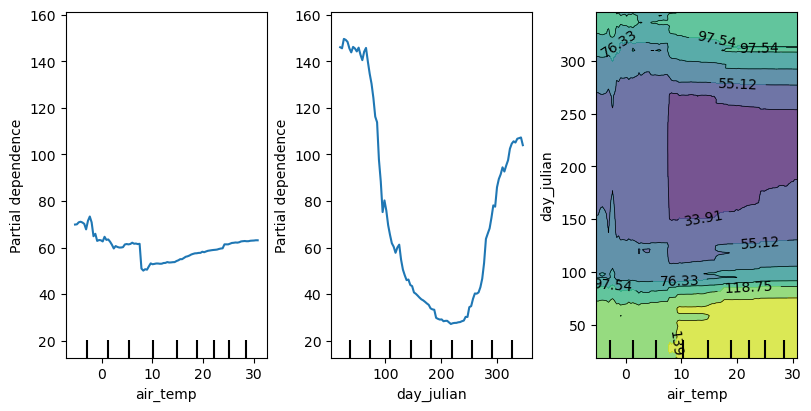

In [33]:
pdp.pdp_interaction(automl,df,variables=['air_temp','day_julian',('air_temp','day_julian')],
                  kind='average',training_only=True,ncols=3,figsize=(8,4),constrained_layout=True)

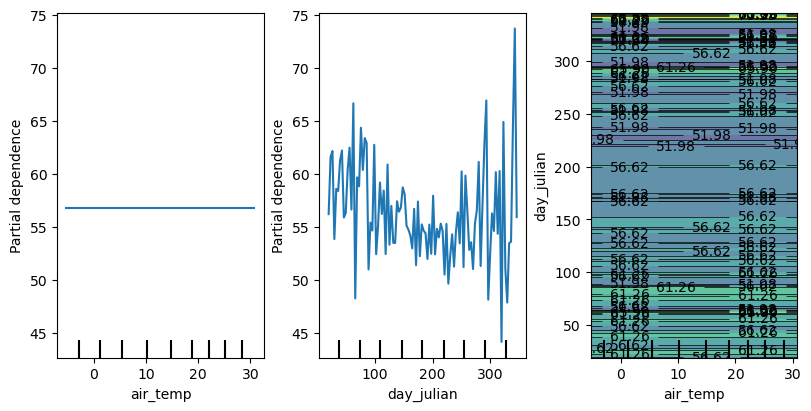

In [34]:
pdp.pdp_nointeraction(automl,df,feature_names=all_features,variables=['air_temp','day_julian',('air_temp','day_julian')],
                  kind='average',training_only=True,ncols=3,figsize=(8,4),constrained_layout=True)

In [6]:
#date_parser = lambda x: pd.to_datetime(x, format='%d/%m/%Y %H:%M:%S')
df=pd.read_excel(r'./normet/datasets/Deweather/testdata.xlsx',parse_dates=['date'])

In [7]:
df.tail()

,date,ssr,tp,blh,tcc,sp,ws,wd,air_temp,atmos_pres,...,CO,NO2,O3,O3_8h,SO2,PM10,PM2.5,Ox,Lunar_monthday,day
23193,2021-12-17 02:00:00,0.000000e+00,0.0,1874.825374,0.0,102327.652154,4.466667,317.985371,-3.800000,1035.5,...,0.24,4.0,57.0,58.0,2.0,24.0,5.0,30.134524,11&14,351
23194,2021-12-17 05:00:00,0.000000e+00,0.0,1518.078727,0.0,102494.152056,9.733333,326.831613,-6.800000,1037.1,...,0.26,4.0,57.0,58.0,3.0,29.0,4.0,30.134524,11&14,351
23195,2021-12-17 08:00:00,2.126463e+04,0.0,NaN,NaN,NaN,4.900000,321.894414,-7.000000,1038.9,...,0.32,9.0,50.0,56.0,3.0,17.0,5.0,29.256404,11&14,351
23196,2021-12-17 11:00:00,1.144851e+06,0.0,NaN,NaN,NaN,5.966667,284.954870,-3.900000,1039.3,...,0.31,5.0,55.0,54.0,3.0,14.0,6.0,29.663338,11&14,351
23197,2021-12-17 14:00:00,1.235697e+06,0.0,NaN,NaN,NaN,4.266667,287.134786,-1.233333,1036.4,...,0.31,6.0,57.0,54.0,3.0,9.0,6.0,31.162568,11&14,351


In [8]:
#df1=df.iloc[:4000,:]

In [9]:
all_features=['date_unix','day_julian', 'weekday', 'hour','ws', 'wd','air_temp', 'atmos_pres', 'dew_point', 'RH','blh']

In [12]:
dfrd,mod_stats=ad.rolling_dew(df,value='PM2.5',window_days=15,feature_names=all_features,
              split_method = 'random',time_budget=30,
                     variables_sample=['ws', 'wd','air_temp', 'atmos_pres', 'dew_point', 'RH','blh'], 
                     n_samples=300,fraction=0.75)

In [13]:
dfry,mod_stats=ad.rolling_dew(df,value='PM2.5',window_days=365,feature_names=all_features,
              split_method = 'random',time_budget=30,
                     variables_sample=['ws', 'wd','air_temp', 'atmos_pres', 'dew_point', 'RH','blh'], 
                     n_samples=300,fraction=0.75)

In [14]:
dfrx,mod_statsx=ad.do_all(df,value='PM2.5',feature_names=all_features,
              split_method = 'random',time_budget=30,
                     variables_sample=['ws', 'wd','air_temp', 'atmos_pres', 'dew_point', 'RH','blh'], 
                     n_samples=300,fraction=0.75)

In [19]:
dfrd.head()

,Observed,Deweathered_7654321,Deweathered_7654321,Deweathered_7654321,Deweathered_7654321,Deweathered_7654321,Deweathered_7654321,Deweathered_7654321,Deweathered_7654321,Deweathered_7654321,...,Deweathered_7654321,Deweathered_7654321,Deweathered_7654321,Deweathered_7654321,Deweathered_7654321,Deweathered_7654321,Deweathered_7654321,Deweathered_7654321,Deweathered_7654321,Deweathered_7654321
date,,,,,,,,,,,,,,,,,,,,,
2014-01-01 08:00:00,45.166667,57.381985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 11:00:00,28.000000,73.080811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 14:00:00,23.166667,67.896317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 17:00:00,23.833333,74.630051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 20:00:00,59.750000,68.968285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
dfrd['Mean']=np.mean(dfrd.iloc[:,1:],axis=1)

In [24]:
dfrd['Std']=np.std(dfrd.iloc[:,1:-1],axis=1)

In [26]:
dfry['Mean']=np.mean(dfry.iloc[:,1:],axis=1)

In [27]:
dfry['Std']=np.mean(dfry.iloc[:,1:-1],axis=1)

<Axes: xlabel='date'>

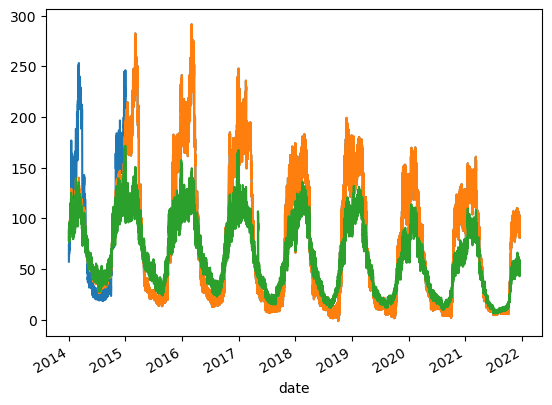

In [31]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots()
dfrd['Mean'].plot(ax=ax)
dfry['Mean'].plot(ax=ax)
dfrx.iloc[:,1].plot(ax=ax)

In [55]:
dfrx['Short']=dfrx['Observed']-dfrd['Mean']

In [56]:
dfrx['Season']=dfrd['Mean']-dfrx.iloc[:,1]

In [57]:
dfrx

,Observed,Deweathered_7654321,Short,Season
date,,,,
2014-01-01 08:00:00,45.166667,79.370827,-12.215318,-21.988842
2014-01-01 11:00:00,28.000000,86.419495,-45.080811,-13.338684
2014-01-01 14:00:00,23.166667,87.006012,-44.729650,-19.109695
2014-01-01 17:00:00,23.833333,88.070213,-50.796717,-13.440163
2014-01-01 20:00:00,59.750000,82.523750,-9.218285,-13.555466
...,...,...,...,...
2021-12-17 02:00:00,5.000000,47.843201,-75.988426,33.145226
2021-12-17 05:00:00,4.000000,46.536167,-76.628021,34.091854
2021-12-17 08:00:00,5.000000,47.760719,-78.390259,35.629539


<Axes: xlabel='date'>

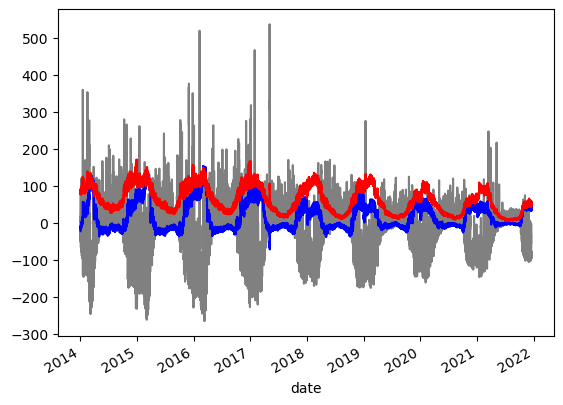

In [58]:
dfrx['Short'].plot(c='grey')
dfrx['Season'].plot(c='b')
dfrx['Deweathered_7654321'].plot(c='r')

In [59]:
from scipy import stats

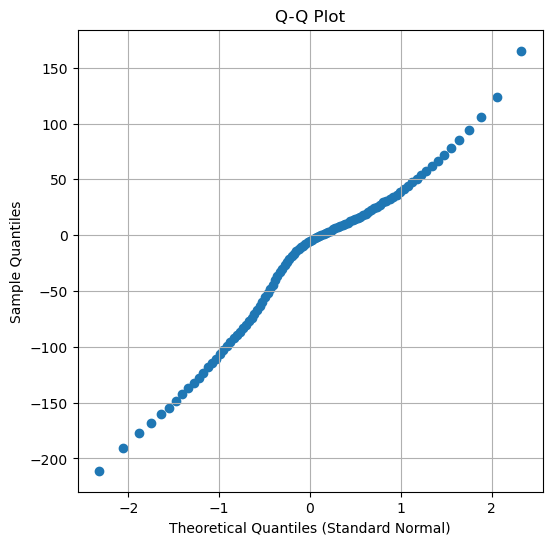

In [60]:
quantiles = np.percentile(dfrx['Short'], np.arange(0, 101, 1))

# 生成标准正态分布的分位数
std_quantiles = stats.norm.ppf(np.arange(0, 101, 1) / 100)

# 创建Q-Q图
plt.figure(figsize=(6, 6))
plt.scatter(std_quantiles, quantiles)
plt.xlabel('Theoretical Quantiles (Standard Normal)')
plt.ylabel('Sample Quantiles')
plt.title('Q-Q Plot')
plt.grid(True)
plt.show()

In [63]:
dfrd=dfrd[['Observed','Mean','Std']]
dfry=dfry[['Observed','Mean','Std']]

In [64]:
dfrd.to_csv('./normet/datasets/Deweather/Dew_15days.csv')
dfry.to_csv('./normet/datasets/Deweather/Dew_365days.csv')
dfrx.to_csv('./normet/datasets/Deweather/Dew_alldata.csv')

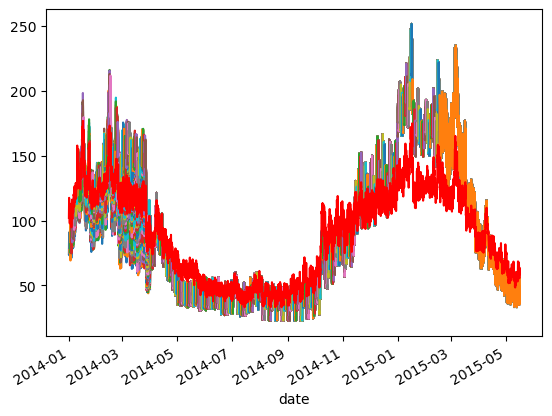

In [18]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots()
dfr.iloc[:,1:].plot(ax=ax)
dfrx.iloc[:,1:].plot(c='r',ax=ax)
ax.legend().set_visible(False)

In [6]:
#date_parser = lambda x: pd.to_datetime(x, format='%d/%m/%Y %H:%M:%S')
df=pd.read_excel(r'./normet/datasets/Deweather/testdata.xlsx',parse_dates=['date'])

In [7]:
all_features=['date_unix','day_julian', 'weekday', 'hour','ws', 'wd','air_temp', 'atmos_pres', 'dew_point', 'RH','blh']

In [8]:
dft,mod_stats=ad.ts_decom(df,value='PM2.5',feature_names=all_features,
              split_method = 'random',time_budget=60,
                     variables_sample=['ws', 'wd','air_temp', 'atmos_pres', 'dew_point', 'RH','blh'], 
                     n_samples=300,fraction=0.75,window_days=15)

<Axes: xlabel='date'>

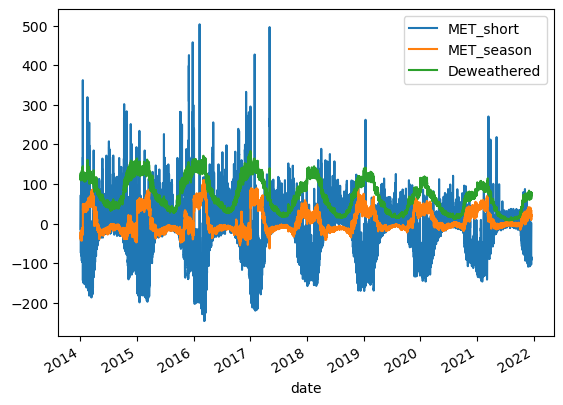

In [12]:
dft[['MET_short','MET_season','Deweathered']].plot()

<Axes: xlabel='date'>

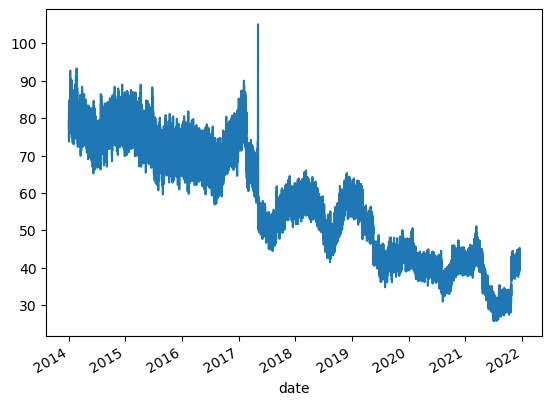

In [11]:
dft['date_unix'].plot()

<Axes: xlabel='date'>

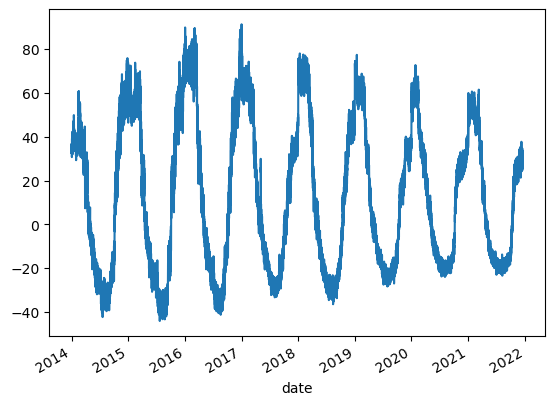

In [13]:
dft['day_julian'].plot()